# Titanic - Machine Learning from Disaster
 
### We uesd 6 algorithms 
 
* Logistic Regression 
* K Nearest Neighbor 
* Support Vector Machine (Linear) T
* Support Vector Machine (RBF) 
* Gaussian Naive Bayes 
* Decision Tree 
* Random Forest


## Data Overview

#### The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

Dataset link

https://www.kaggle.com/c/titanic/data


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#import dftrain csv files
dftrain = pd.read_csv("../input/titanic/train.csv")
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dftrain.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
#import dftest csv files
dftest = pd.read_csv("../input/titanic/test.csv")
dftest


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
dftrain.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
dftrain.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#dftrain.dropna(axis=0, inplace=True)

In [11]:
#dftrain.isna().sum(axis=0)

In [12]:
dftest.isna().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
#dftest.dropna(axis=0, inplace=True)

In [14]:
dftest.isna().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


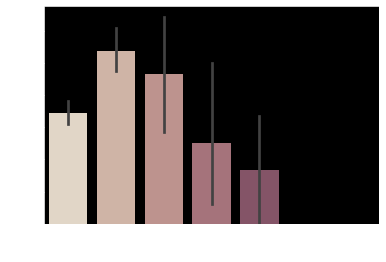

In [17]:
sns.barplot(x="SibSp", y="Survived", data=dftrain,palette="ch:.25")

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", dftrain["Survived"][dftrain["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", dftrain["Survived"][dftrain["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", dftrain["Survived"][dftrain["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In [18]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


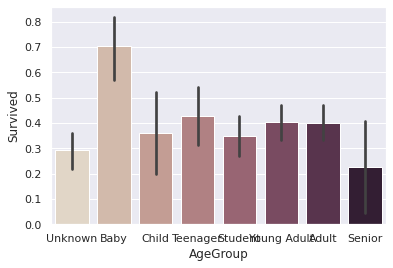

In [19]:
dftrain["Age"] = dftrain["Age"].fillna(-0.5)
dftest["Age"] = dftest["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
dftrain['AgeGroup'] = pd.cut(dftrain["Age"], bins, labels = labels)
dftest['AgeGroup'] = pd.cut(dftest["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.set(font_scale = 1)
sns.barplot(x="AgeGroup", y="Survived" , palette="ch:.25",data=dftrain)
plt.show()

In [20]:
dftrain["CabinBool"] = (dftrain["Cabin"].notnull().astype('int'))
dftest["CabinBool"] = (dftest["Cabin"].notnull().astype('int'))




In [21]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adult,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Student,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.4500,NaN,S,Unknown,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult,1


In [22]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Student,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,A.5. 3236,8.0500,NaN,S,Unknown,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Adult,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Adult,0
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,359309,8.0500,NaN,S,Unknown,0


In [23]:
dftrain["Survived"][dftrain["CabinBool"] == 1].value_counts(normalize = True)[1]*100

66.66666666666666

In [24]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Student,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,A.5. 3236,8.0500,NaN,S,Unknown,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Adult,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Adult,0
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,359309,8.0500,NaN,S,Unknown,0


In [25]:
#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", dftrain["Survived"][dftrain["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", dftrain["Survived"][dftrain["CabinBool"] == 0].value_counts(normalize = True)[1]*100)


Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


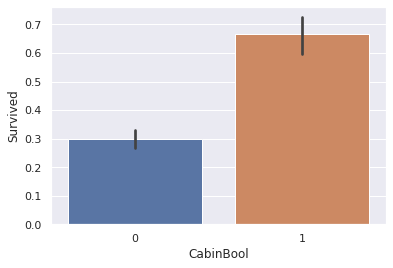

In [26]:
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=dftrain)
plt.show()

In [27]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
dftrain = dftrain.drop(['Cabin'], axis = 1)
dftest = dftest.drop(['Cabin'], axis = 1)


In [28]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,CabinBool
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Young Adult,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Adult,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Senior,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Young Adult,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Student,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,A.5. 3236,8.0500,S,Unknown,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Adult,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Adult,0
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,359309,8.0500,S,Unknown,0


In [29]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
dftrain = dftrain.drop(['Ticket'], axis = 1)
dftest = dftest.drop(['Ticket'], axis = 1)

In [30]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Young Adult,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Adult,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Senior,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Young Adult,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Student,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,8.0500,S,Unknown,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Adult,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Adult,0
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,8.0500,S,Unknown,0


In [31]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = dftrain[dftrain["Embarked"] == "S"].shape[0]
print(southampton)


Number of people embarking in Southampton (S):
644


In [32]:
print("Number of people embarking in Cherbourg (C):")
cherbourg = dftrain[dftrain["Embarked"] == "C"].shape[0]
print(cherbourg)


Number of people embarking in Cherbourg (C):
168


In [33]:
print("Number of people embarking in Queenstown (Q):")
queenstown = dftrain[dftrain["Embarked"] == "Q"].shape[0]
print(queenstown)


Number of people embarking in Queenstown (Q):
77


In [34]:
#replacing the missing values in the Embarked feature with S
dftrain = dftrain.fillna({"Embarked": "S"})

In [35]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  AgeGroup     891 non-null    category
 11  CabinBool    891 non-null    int64   
dtypes: category(1), float64(2), int64(6), object(3)
memory usage: 77.9+ KB


In [36]:
#create a combined group of both datasets
combine = [dftrain, dftest]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(dftrain['Title'], dftrain['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [37]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

dftrain[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [38]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [39]:
# fill missing age with mode age group for each title
mr_age = dftrain[dftrain["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = dftrain[dftrain["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = dftrain[dftrain["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = dftrain[dftrain["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = dftrain[dftrain["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = dftrain[dftrain["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}


for x in range(len(dftrain["AgeGroup"])):
    if dftrain["AgeGroup"][x] == "Unknown":
        dftrain["AgeGroup"][x] = age_title_mapping[dftrain["Title"][x]]
        
for x in range(len(dftest["AgeGroup"])):
    if dftest["AgeGroup"][x] == "Unknown":
        dftest["AgeGroup"][x] = age_title_mapping[dftest["Title"][x]]

In [40]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
dftrain['AgeGroup'] = dftrain['AgeGroup'].map(age_mapping)
dftest['AgeGroup'] = dftest['AgeGroup'].map(age_mapping)

dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5.0,0,1


In [41]:
#dropping the Age feature for now, might change
dftrain = dftrain.drop(['Age'], axis = 1)
dftest = dftest.drop(['Age'], axis = 1)

In [42]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,S,5.0,0,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,S,4.0,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,S,4.0,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,30.0000,C,5.0,1,1


In [43]:
dftest

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,892,3,"Kelly, Mr. James",male,0,0,7.8292,Q,5.0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S,6.0,0,3
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q,7.0,0,1
3,895,3,"Wirz, Mr. Albert",male,0,0,8.6625,S,5.0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S,4.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0,0,8.0500,S,5.0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,108.9000,C,6.0,1,6
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,7.2500,S,6.0,0,1
416,1308,3,"Ware, Mr. Frederick",male,0,0,8.0500,S,5.0,0,1


In [44]:
#drop the name feature since it contains no more useful information.
dftrain = dftrain.drop(['Name'], axis = 1)
dftest = dftest.drop(['Name'], axis = 1)


In [45]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
dftrain['Sex'] = dftrain['Sex'].map(sex_mapping)
dftest['Sex'] = dftest['Sex'].map(sex_mapping)


In [46]:


#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
dftrain['Embarked'] = dftrain['Embarked'].map(embarked_mapping)
dftest['Embarked'] = dftest['Embarked'].map(embarked_mapping)
dftrain.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [47]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(dftest["Fare"])):
    if pd.isnull(dftest["Fare"][x]):
        pclass = dftest["Pclass"][x] #Pclass = 3
        dftest["Fare"][x] = round(dftrain[dftrain["Pclass"] == pclass]["Fare"].mean(), 4)
        

In [48]:
#map Fare values into groups of numerical values
dftrain['FareBand'] = pd.qcut(dftrain['Fare'], 4, labels = [1, 2, 3, 4])
dftest['FareBand'] = pd.qcut(dftest['Fare'], 4, labels = [1, 2, 3, 4])

In [49]:
#drop Fare values
dftrain = dftrain.drop(['Fare'], axis = 1)
dftest = dftest.drop(['Fare'], axis = 1)

In [50]:
print(f"Dataset Terining:",dftrain)
print("______________________________________")
print("______________________________________")
print(f"Dataset Testing:",dftest)

Dataset Terining:      PassengerId  Survived  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  \
0              1         0       3    0      1      0         1       4.0   
1              2         1       1    1      1      0         2       6.0   
2              3         1       3    1      0      0         1       5.0   
3              4         1       1    1      1      0         1       5.0   
4              5         0       3    0      0      0         1       5.0   
..           ...       ...     ...  ...    ...    ...       ...       ...   
886          887         0       2    0      0      0         1       5.0   
887          888         1       1    1      0      0         1       4.0   
888          889         0       3    1      1      2         1       4.0   
889          890         1       1    0      0      0         2       5.0   
890          891         0       3    0      0      0         3       5.0   

     CabinBool  Title FareBand  
0            0      1   

In [51]:
from sklearn.model_selection import train_test_split

predictors = dftrain.drop(['Survived', 'PassengerId'], axis=1)
target = dftrain["Survived"]
X_train, X_test, Y_train, Y_test  = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [52]:
X_train

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
172,3,1,1,1,1,1.0,0,2,2
447,1,0,0,0,1,5.0,0,1,3
597,3,0,0,0,1,6.0,0,1,1
204,3,0,0,0,1,3.0,0,1,2
240,3,1,1,0,2,4.0,0,2,2
...,...,...,...,...,...,...,...,...,...
835,1,1,1,1,2,6.0,1,2,4
192,3,1,1,0,1,4.0,0,2,1
629,3,0,0,0,3,5.0,0,1,1
559,3,1,1,0,1,6.0,0,3,3


In [53]:

def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)
    
  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state =0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
  forest.fit(X_train, Y_train)
  
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.8242074927953891
[1]K Nearest Neighbor Training Accuracy: 0.8357348703170029
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8198847262247838
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8357348703170029
[4]Gaussian Naive Bayes Training Accuracy: 0.7939481268011528
[5]Decision Tree Classifier Training Accuracy: 0.909221902017291
[6]Random Forest Classifier Training Accuracy: 0.9034582132564841


In [54]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

    
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(Y_test)


[[101  23]
 [ 17  56]]
Model[0] Testing Accuracy = "0.7969543147208121!"

[[98 26]
 [18 55]]
Model[1] Testing Accuracy = "0.7766497461928934!"

[[99 25]
 [16 57]]
Model[2] Testing Accuracy = "0.7918781725888325!"

[[107  17]
 [ 17  56]]
Model[3] Testing Accuracy = "0.8274111675126904!"

[[90 34]
 [ 8 65]]
Model[4] Testing Accuracy = "0.7868020304568528!"

[[110  14]
 [ 20  53]]
Model[5] Testing Accuracy = "0.8274111675126904!"

[[105  19]
 [ 18  55]]
Model[6] Testing Accuracy = "0.8121827411167513!"

Model  0
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       124
           1       0.71      0.77      0.74        73

    accuracy                           0.80       197
   macro avg       0.78      0.79      0.79       197
weighted avg       0.80      0.80      0.80       197

0.7969543147208121

Model  1
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       124
           1       0